In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('atp_data.csv')
df2 = pd.read_csv('confidence_data.csv')

pd.set_option('display.max_columns', None) 
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,Tarango J.,6,59,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,Luxa P.,73,174,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,Dupuis A.,33,78,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,Arazi H.,206,35,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5


<hr>

<h2> Quality check du dataframe

In [2]:
from pandas.api.types import is_numeric_dtype, is_string_dtype, is_datetime64_any_dtype
from IPython.display import display

def first_infos(df):

    n_cols = len(df.columns)
    n_rows = len(df)
    n_duplicates = df.duplicated().sum()
    n_na = df.isna().sum().sum()

    return(n_cols, n_rows, n_duplicates, n_na)
def print_infos(df, n_num, n_cat, n_text, n_date):

    cols, rows, duplicates, na = first_infos(df)

    print('Dataframe :\n\t' + str(rows) + ' Rows \n \t' +
          str(na) + ' Missing values\n\t' +
          str(duplicates) + ' Duplicates\n \t' +
          str(cols) + ' Features\n \t' +
          str(n_cat) + ' Categorical\n \t' +
          str(n_num) + ' Numerical\n \t' +
          str(n_text) + ' Text\n \t' +
          str(n_date) + ' Date')
    
def alerts(df):

    # seuils à modifier en fonction des données
    thresh_na = 0.25
#     Pour savoir si il y a pas trop de fois la meme modalité :
    thresh_balance = 0.8 

    for col in df.columns:
        if (df[col].count()/len(df)) < thresh_na:
            print('\nThe feature ' + col + ' contains too much missing values!')
            
#             On prend la preiere valeur du value count qui est la plus fréquente :
        if df[col].value_counts(normalize=True).values[0] > thresh_balance:
            print('\nThe feature ' + col + ' is Imbalanced. Try to fix it !')
def quality_check(df):

    # On initialise les variables qui comptabiliseront le nombre de chaque type

    n_text = 0
    n_num = 0
    n_cat = 0
    n_date = 0


    data_qlt_df = pd.DataFrame(index=np.arange(0, len(df.columns)),
                               columns=('column_name', 'col_data_type', 'non_null_values', '%_non_null',
                                        'unique_values_count', 'column_type')
                               )

    for ind, col in enumerate(df.columns):
        # On compte le nombre de valeurs uniques par variable
        col_unique_count = df[col].nunique()

        # On compte le nombre de valeurs non nulles
        non_null = df[col].count()

        # On calcule le pourcentage de valeurs non nulles
        p_non_null = (df[col].count()/len(df))*100

        # On associe à chaque colonne un type en fonction de seuils arbitraires
        if is_datetime64_any_dtype(df[col]):
            col_type = 'Date'
            n_date += 1
        elif is_numeric_dtype(df[col]) & (col_unique_count > 50):
            col_type = 'Numerical'
            n_num += 1
        elif (is_string_dtype(df[col])) & (col_unique_count > 100):
            col_type = 'Text'
            n_text += 1
        else:
            col_type = 'Categorical'
            n_cat += 1

        data_qlt_df.loc[ind] = [col,
                                df[col].dtype,
                                non_null,
                                p_non_null,
                                col_unique_count,
                                col_type
                                ]

    # On utilise la transposé de describe() pour obtenir les statistiques sur les variables numériques
    raw_num_df = df.describe().T.round(2)

    # Puis on merge le résultat avec le reste pour obtenir un Dataframe complet
    data_qlt_df = pd.merge(data_qlt_df, raw_num_df, how='left',
                           left_on='column_name', right_index=True)

    # On affiche les infos globales
    print_infos(df,  n_num, n_cat, n_text, n_date)

    # On affiche les alertes s'il y en a
#     alerts(df)

    # afficher le Tableau récapitulatif
    display(data_qlt_df)


In [3]:
quality_check(df)

Dataframe :
	44708 Rows 
 	35626 Missing values
	0 Duplicates
 	23 Features
 	8 Categorical
 	10 Numerical
 	5 Text
 	0 Date


,column_name,col_data_type,non_null_values,%_non_null,unique_values_count,column_type,count,mean,std,min,25%,50%,75%,max
0,ATP,int64,44708,100,69,Numerical,44708.0,32.80,18.17,1.00,19.00,32.00,49.00,69.00
1,Location,object,44708,100,115,Text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tournament,object,44708,100,207,Text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Date,object,44708,100,4104,Text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Series,object,44708,100,8,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Court,object,44708,100,2,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Surface,object,44708,100,4,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Round,object,44708,100,8,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Best of,int64,44708,100,2,Categorical,44708.0,3.37,0.78,3.00,3.00,3.00,3.00,5.00
9,Winner,object,44708,100,899,Text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
#  Les variables rank sont considérées comme numeriques mais elles sont catégorielles ordinales
# Il est plus avantaheux d'utilser pinacle que B365

<hr>
<h2> Distribution des variables quantitatives </h2>

/home/anthony/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/anthony/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/anthony/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

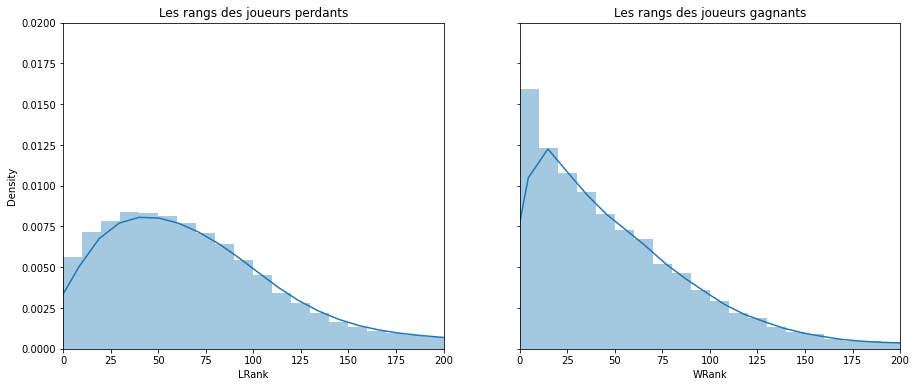

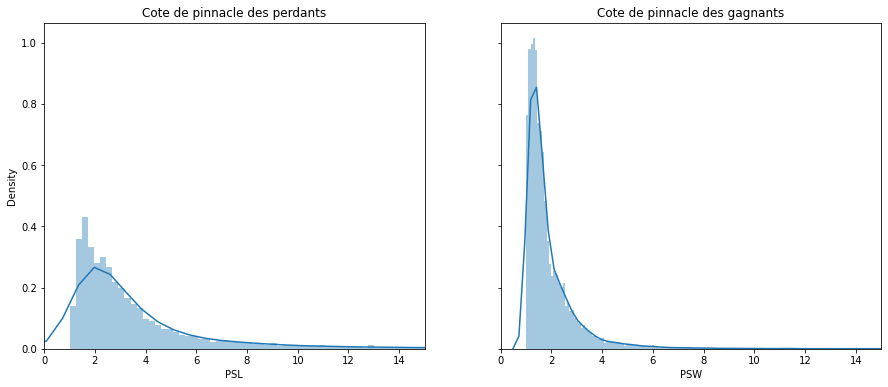

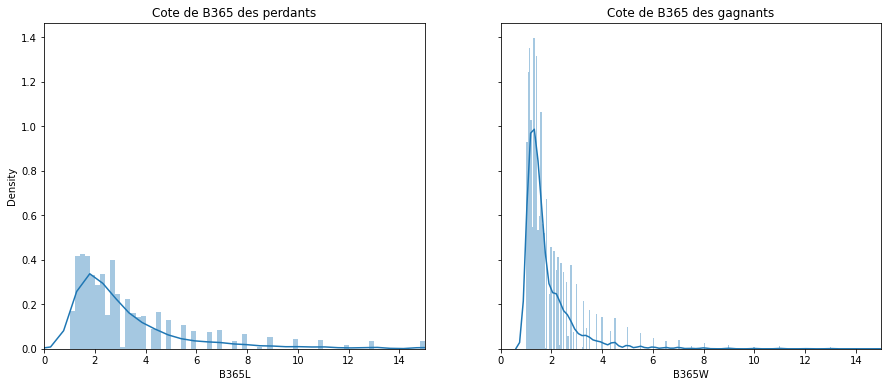

In [19]:
# Etendue des valeurs quantitatives

fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True, figsize=(15,6))
ax1.set_title('Les rangs des joueurs perdants')
ax2.set_title('Les rangs des joueurs gagnants')
plt.axis([0, 200, 0, 0.02]) 
sns.distplot(df.LRank, bins =200, ax = ax1)
ax1.set_xlim(0,200)
sns.distplot(df.WRank, bins =200, ax = ax2)

fig2, (ax3, ax4) = plt.subplots(ncols = 2, sharey = True, figsize=(15,6))
ax3.set_title('Cote de pinnacle des perdants')
ax4.set_title('Cote de pinnacle des gagnants')
plt.xlim([0, 15])
sns.distplot(df.PSW, bins =500, ax = ax4)
ax3.set_xlim(0,15)
sns.distplot(df.PSL, bins =500, ax = ax3)

fig3, (ax5, ax6) = plt.subplots(ncols = 2, sharey = True, figsize=(15,6))
ax5.set_title('Cote de B365 des perdants')
ax6.set_title('Cote de B365 des gagnants')
plt.xlim([0, 15])
sns.distplot(df.B365L, bins =500, ax = ax5)
ax5.set_xlim(0,15)
sns.distplot(df.B365W, bins =500, ax = ax6);


In [6]:
# Séparation variables quantitatives
num_feats = df[['ATP', 'PSW', 'PSL','B365W','B365L', 'elo_winner', 'elo_loser', 'proba_elo']]
cat_feat = df[['Series','Court', 'Surface','Best of','Winner','Loser', 'Tournament', 'ATP', 'WRank', 'LRank']]
corr = num_feats.corr()

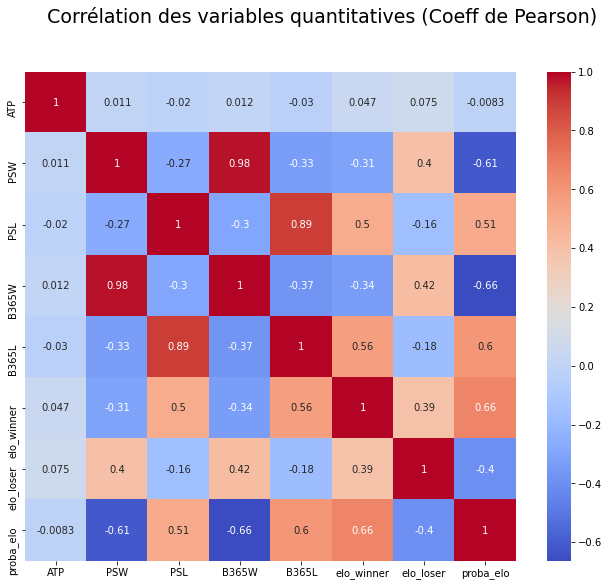

In [9]:
# Corrélation des variables quantitatives
fig, ax = plt.subplots(figsize = (11,9))
sns.heatmap(corr, annot = True, cbar = True, cmap = 'coolwarm')
plt.gcf().suptitle('Corrélation des variables quantitatives (Coeff de Pearson)', fontsize = 19);

<hr>
<h2> Corrélation des variables qualitatives </h2>

<hr>
<h2> Transformation des variables qualitatives </h2>

In [14]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in cat_feat.columns :
  data_encoded[i]=label.fit_transform(cat_feat[i])

In [16]:
cat_feat

,Series,Court,Surface,Best of,Winner,Loser,Tournament,ATP,WRank,LRank
0,International,Outdoor,Hard,3,Dosedel S.,Ljubicic I.,Australian Hardcourt Championships,1,63,77
1,International,Outdoor,Hard,3,Kiefer N.,Tarango J.,Qatar Open,3,6,59
2,International,Outdoor,Hard,3,Gaudio G.,Luxa P.,Qatar Open,3,73,174
3,International,Outdoor,Hard,3,El Aynaoui Y.,Dupuis A.,Qatar Open,3,33,78
4,International,Outdoor,Hard,3,Cherkasov A.,Arazi H.,Qatar Open,3,206,35
...,...,...,...,...,...,...,...,...,...,...
44703,ATP500,Outdoor,Hard,3,Bautista Agut R.,Pouille L.,Dubai Tennis Championships,17,23,15
44704,ATP500,Outdoor,Hard,3,Anderson K.,Donaldson J.,Abierto Mexicano,16,8,59
44705,ATP250,Indoor,Clay,3,Jarry N.,Zeballos H.,Brasil Open,18,73,69
44706,ATP500,Outdoor,Hard,3,Del Potro J.M.,Anderson K.,Abierto Mexicano,16,9,8


In [15]:
data_encoded

,Series,Court,Surface,Best of,Winner,Loser,Tournament,ATP,WRank,LRank
0,3,1,3,0,202,724,18,0,63,77
1,3,1,3,0,394,1213,150,2,6,59
2,3,1,3,0,276,747,150,2,73,174
3,3,1,3,0,217,318,150,2,33,78
4,3,1,3,0,130,50,150,2,206,35
...,...,...,...,...,...,...,...,...,...,...
44703,1,1,3,0,50,979,60,16,23,15
44704,1,1,3,0,22,307,11,15,8,59
44705,0,0,1,0,367,1373,30,17,73,69
44706,1,1,3,0,176,39,11,15,9,8


In [139]:
# def de V de cramer
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

<hr>
<h2> Matrix et heatmap </h2>

In [206]:
# Building of the matrix
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_cramer = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df_cramer

Index Title,Series,Court,Surface,Best of,Winner,Loser,Tournament,ATP,WRank,LRank
Index Title,,,,,,,,,,
Series,1.00,0.09,0.05,0.99,0.11,0.11,0.80,0.31,0.03,0.04
Court,0.09,1.00,0.27,0.05,0.07,0.06,0.98,0.71,0.02,0.02
Surface,0.05,0.27,1.00,0.05,0.11,0.08,0.89,0.57,0.03,0.02
Best of,0.99,0.05,0.05,1.00,0.04,0.03,0.99,0.64,0.03,0.02
Winner,0.11,0.07,0.11,0.04,1.00,0.09,0.05,0.04,0.21,0.04
Loser,0.11,0.06,0.08,0.03,0.09,1.00,0.05,0.04,0.06,0.22
Tournament,0.80,0.98,0.89,0.99,0.05,0.05,1.00,0.49,0.03,0.02
ATP,0.31,0.71,0.57,0.64,0.04,0.04,0.49,1.00,0.02,0.02
WRank,0.03,0.02,0.03,0.03,0.21,0.06,0.03,0.02,1.00,0.04


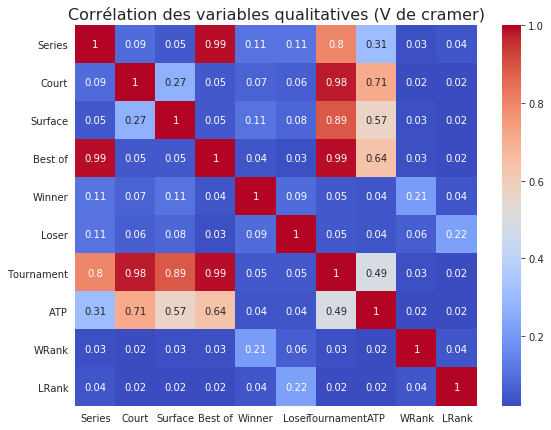

In [141]:
# Add a heatmap to the matrix
mask = np.zeros_like(df_cramer, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (9,7))
    ax = sns.heatmap(df_cramer, annot = True, cbar = True, cmap = 'coolwarm')
    plt.title('Corrélation des variables qualitatives (V de cramer)', fontsize = 16)

plt.show()

<hr>
<h2> Dataviz </h2>

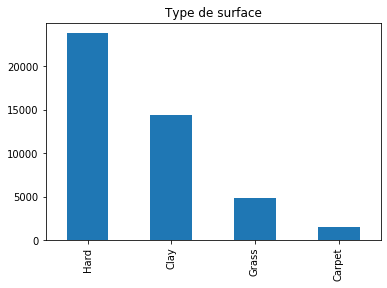

In [153]:
df.Surface.value_counts().plot.bar()
plt.title('Type de surface');

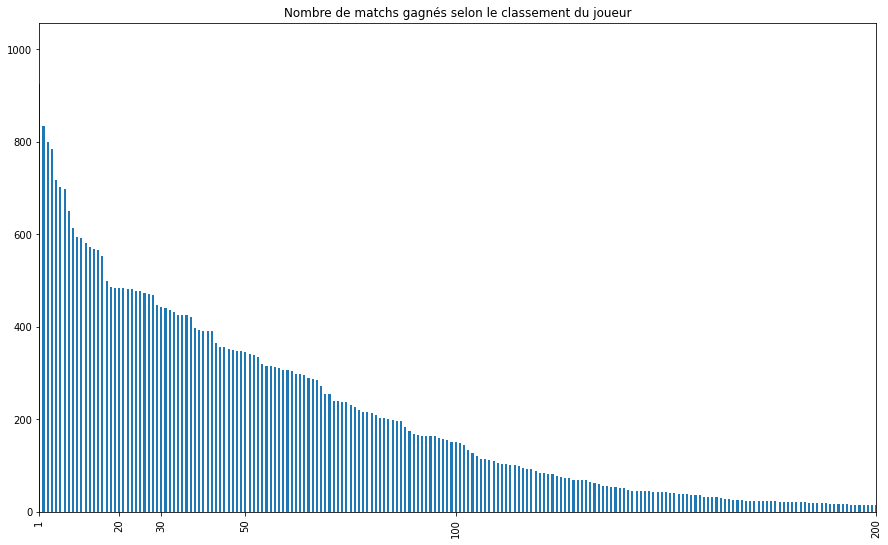

In [17]:
fig, ax = plt.subplots(figsize = (15,9))
df.WRank.value_counts().plot.bar()
plt.xlim([1,200])
plt.xticks([1,20,30,50,100,200], [1,20,30,50,100,200])
plt.title('Nombre de matchs gagnés selon le classement du joueur');

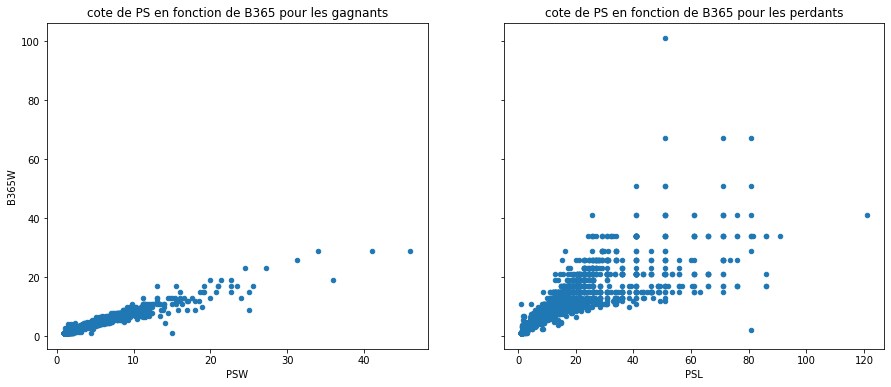

In [241]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True, figsize=(15,6))

df.plot.scatter(x = 'PSW', y = 'B365W', ax =ax1) 
ax1.set_title('cote de PS en fonction de B365 pour les gagnants')

df.plot.scatter(x = 'PSL', y = 'B365L', ax = ax2)
ax2.set_title('cote de PS en fonction de B365 pour les perdants');

In [268]:
import statsmodels.api
result = statsmodels.formula.api.ols('elo_winner ~Winner', data = df).fit()
anova1 = statsmodels.api.stats.anova_lm(result)

In [269]:
import statsmodels.api
result = statsmodels.formula.api.ols('PSW ~Winner', data = df).fit()
anova2 = statsmodels.api.stats.anova_lm(result)


In [270]:
import statsmodels.api
result = statsmodels.formula.api.ols('B365W ~Winner', data = df).fit()
anova3 = statsmodels.api.stats.anova_lm(result)

<h2> Anova Winner-elo_winner, 
Anova Winner-PSW, 
Winner-B365W </h2> </h2>

In [267]:
display(anova1, anova2, anova3)

,df,sum_sq,mean_sq,F,PR(>F)
Winner,898.0,1.065056e+09,1.186031e+06,139.919753,0.0
Residual,43809.0,3.713475e+08,8.476512e+03,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
Winner,898.0,8797.619050,9.796903,6.062257,0.0
Residual,32061.0,51812.142155,1.616049,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
Winner,898.0,7871.317685,8.765387,8.362366,0.0
Residual,38268.0,40112.314553,1.048195,NaN,NaN


In [18]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')